# For Visualization

In [1]:
import pandas as pd
import json

def read_twitter_json_custom(file_path):
    """自定义处理Twitter JSON，提取特定字段"""
    try:
        # 读取原始数据
        with open(file_path, 'r', encoding='utf-8') as f:
            if file_path.endswith('.jsonl') or file_path.endswith('.json'):
                # 尝试逐行读取（JSON Lines格式）
                data = []
                f.seek(0)  # 重置文件指针
                try:
                    for line in f:
                        if line.strip():
                            data.append(json.loads(line))
                except:
                    # 如果逐行读取失败，尝试整体读取
                    f.seek(0)
                    data = json.load(f)
        
        # 处理数据，展平嵌套字段
        processed_data = []
        for tweet in data:
            processed_tweet = {
                'id': tweet.get('id'),
                'id_str': tweet.get('id_str'),
                'text': tweet.get('text'),
                'created_at': tweet.get('created_at'),
                'timestamp_ms': tweet.get('timestamp_ms'),
                'lang': tweet.get('lang'),
                'screen_name': tweet.get('screen_name'),
                'followers_count': tweet.get('followers_count'),
                'country': tweet.get('country'),
                'country_code': tweet.get('country_code'),
                'location': tweet.get('location'),
                'full_name': tweet.get('full_name'),
                'place_type': tweet.get('place_type'),
                'time_zone': tweet.get('time_zone'),
                'utc_offset': tweet.get('utc_offset'),
                'source': tweet.get('source'),
                'hashtags': tweet.get('hashtags'),
                'urls': tweet.get('urls'),
                'in_reply_to_screen_name': tweet.get('in_reply_to_screen_name'),
                'profile_image_url': tweet.get('profile_image_url'),
                # 处理coordinates字段
                'coordinates': tweet.get('coordinates'),
                # 处理geo字段
                'geo_type': tweet.get('geo', {}).get('type') if tweet.get('geo') else None,
                'geo_coordinates': tweet.get('geo', {}).get('coordinates') if tweet.get('geo') else None,
                # 处理bounding_box字段
                'bounding_box_type': tweet.get('bounding_box', {}).get('type') if tweet.get('bounding_box') else None,
                'bounding_box_coordinates': tweet.get('bounding_box', {}).get('coordinates') if tweet.get('bounding_box') else None,
            }
            processed_data.append(processed_tweet)
        
        df = pd.DataFrame(processed_data)
        return df
        
    except Exception as e:
        print(f"读取失败: {e}")
        return None

In [2]:
json_path = "/media/ys_tum/T7 Shield/25SS/SDI_data/tweets_europe_west_2016_05_10.json"
df = read_twitter_json_custom(json_path)
df

,id,id_str,text,created_at,timestamp_ms,lang,screen_name,followers_count,country,country_code,...,source,hashtags,urls,in_reply_to_screen_name,profile_image_url,coordinates,geo_type,geo_coordinates,bounding_box_type,bounding_box_coordinates
0,616629946,730114479271325696,"Un toque de locura nunca viene mal, pues eso, ...",Tue May 10 19:17:11 +0000 2016,1462907831386,es,inmita96,736,España,ES,...,"<a href=""http://instagram.com"" rel=""nofollow"">...",[],"[{""url"":""https://t.co/DGajofgNVK"",""indices"":[6...",null,http://pbs.twimg.com/profile_images/5618528590...,"[-4.46483776,36.72159228]",Point,"[36.72159228,-4.46483776]",Polygon,"[[[-4.587928,36.635585],[-4.587928,36.894171],..."
1,2735908681,730114478994558976,Motion de censure : Valls ne «craint» pas le r...,Tue May 10 19:17:11 +0000 2016,1462907831320,fr,VeilleDeCM,5392,France,FR,...,"<a href=""https://twitter.com/"" rel=""nofollow"">...",[],"[{""url"":""https://t.co/VaJm6hswH8"",""indices"":[7...",null,http://pbs.twimg.com/profile_images/7268067947...,"[2.2892648,48.8249147]",Point,"[48.8249147,2.2892648]",Polygon,"[[[2.272565,48.814219],[2.272565,48.828441],[2..."
2,29709169,730114480953294848,Se car el cielo en primavera #Madrid #puertade...,Tue May 10 19:17:11 +0000 2016,1462907831787,es,laanabanana,867,España,ES,...,"<a href=""http://instagram.com"" rel=""nofollow"">...","[{""indices"":[29,36],""text"":""Madrid""},{""indices...","[{""url"":""https://t.co/lx4m50YnjD"",""indices"":[7...",null,http://pbs.twimg.com/profile_images/7279184836...,"[-3.70352705,40.41705918]",Point,"[40.41705918,-3.70352705]",Polygon,"[[[-3.889005,40.312071],[-3.889005,40.643518],..."
3,245757203,730114479980171264,@rhagallery @MickODeaArtist lovely to visit th...,Tue May 10 19:17:11 +0000 2016,1462907831555,en,CreativChangeNI,2062,Ireland,IE,...,"<a href=""http://www.twitter.com"" rel=""nofollow...",[],[],rhagallery,http://pbs.twimg.com/profile_images/7299305123...,"[-6.24724667,53.33875333]",Point,"[53.33875333,-6.24724667]",Polygon,"[[[-6.387438,53.298745],[-6.387438,53.41106],[..."
4,336893128,730114485403312129,"Desnudo como Adán el primer día @ Rome, Italy ...",Tue May 10 19:17:12 +0000 2016,1462907832848,es,Juli3n_T,1040,Italia,IT,...,"<a href=""http://instagram.com"" rel=""nofollow"">...",[],"[{""url"":""https://t.co/xIwMFhzJBZ"",""indices"":[4...",null,http://pbs.twimg.com/profile_images/7229318891...,"[12.5,41.9]",Point,"[41.9,12.5]",Polygon,"[[[12.234427,41.655874],[12.234427,42.140959],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179978,113367393,730688322532691968,"I'm at Géant Casino in Paris, Île-de-France ht...",Thu May 12 09:17:26 +0000 2016,1463044646281,fr,erhardignity,491,France,FR,...,"<a href=""http://foursquare.com"" rel=""nofollow""...",[],"[{""url"":""https://t.co/RGkmdmLkWE"",""indices"":[4...",null,http://pbs.twimg.com/profile_images/6227892468...,"[2.36605178,48.8214929]",Point,"[48.8214929,2.36605178]",Polygon,"[[[2.224101,48.815521],[2.224101,48.902146],[2..."
179979,995313278,730688322813722624,Castle🏰\n#castle #sightseeing #instadaily #ins...,Thu May 12 09:17:26 +0000 2016,1463044646348,en,avviatorka,6,Polska,PL,...,"<a href=""http://instagram.com"" rel=""nofollow"">...","[{""indices"":[8,15],""text"":""castle""},{""indices""...","[{""url"":""https://t.co/Eod8yTgkWT"",""indices"":[9...",null,http://pbs.twimg.com/profile_images/6297782678...,"[22.64954142,49.77638364]",Point,"[49.77638364,22.64954142]",Polygon,"[[[22.533553,49.682445],[22.533553,49.824577],..."
179980,3388331092,730688331261022208,Good morning to you all! Have a good day.....,Thu May 12 09:17:28 +0000 2016,1463044648362,en,robertpaul2010,65,United Kingdom,GB,...,"<a href=""https://twitter.com/download/android""...",[],[],null,http://pbs.twimg.com/profile_images/7305552142...,"[-0.3408017,51.5239592]",Point,"[51.5239592,-0.3408017]",Polygon,"[[[-0.351597,51.491866],[-0.351597,51.537638],..."
179981,216013461,730688331898589184,You needs Majorca wh

## Check the Language Distributions & Missing values

<Axes: >

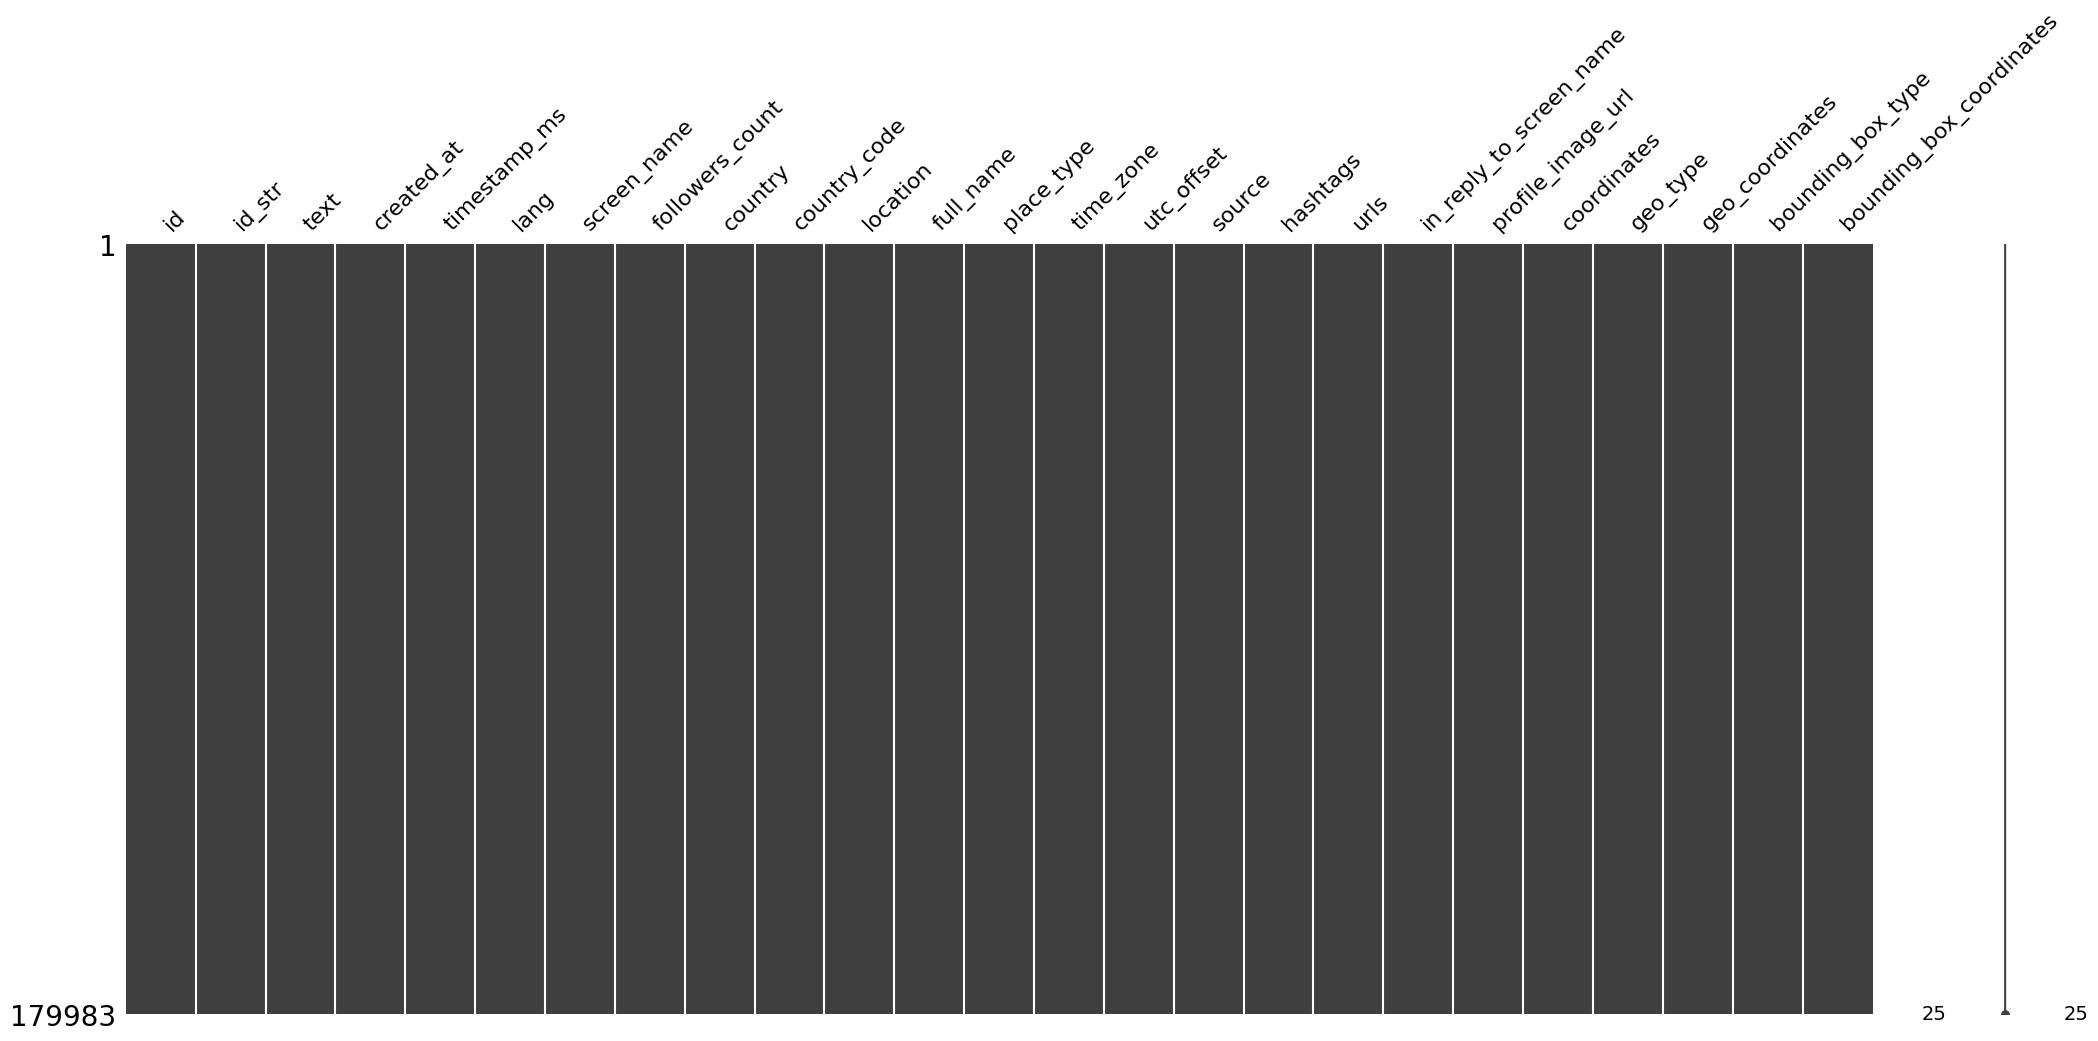

In [3]:
import missingno as msno
msno.matrix(df)

Lanugages:
  en: 84113 items, 46.73 %
  es: 22367 items, 12.43 %
  und: 11178 items, 6.21 %
  fr: 10857 items, 6.03 %
  de: 9612 items, 5.34 %
  it: 7715 items, 4.29 %
  nl: 6878 items, 3.82 %
  ru: 5023 items, 2.79 %
  pt: 3662 items, 2.03 %
  pl: 1956 items, 1.09 %
  sv: 1776 items, 0.99 %
  fi: 1578 items, 0.88 %
  lv: 1412 items, 0.78 %
  ar: 1394 items, 0.77 %
  in: 1379 items, 0.77 %
  uk: 1058 items, 0.59 %
  da: 985 items, 0.55 %
  cs: 822 items, 0.46 %
  no: 761 items, 0.42 %
  et: 664 items, 0.37 %
  ro: 504 items, 0.28 %
  el: 502 items, 0.28 %
  tr: 498 items, 0.28 %
  tl: 450 items, 0.25 %
  ht: 440 items, 0.24 %
  hu: 374 items, 0.21 %
  bg: 318 items, 0.18 %
  sl: 293 items, 0.16 %
  cy: 276 items, 0.15 %
  eu: 266 items, 0.15 %
  ja: 229 items, 0.13 %
  is: 198 items, 0.11 %
  lt: 157 items, 0.09 %
  ko: 76 items, 0.04 %
  th: 62 items, 0.03 %
  hi: 55 items, 0.03 %
  zh: 41 items, 0.02 %
  sr: 25 items, 0.01 %
  vi: 19 items, 0.01 %
  fa: 7 items, 0.00 %
  ur: 1 items,

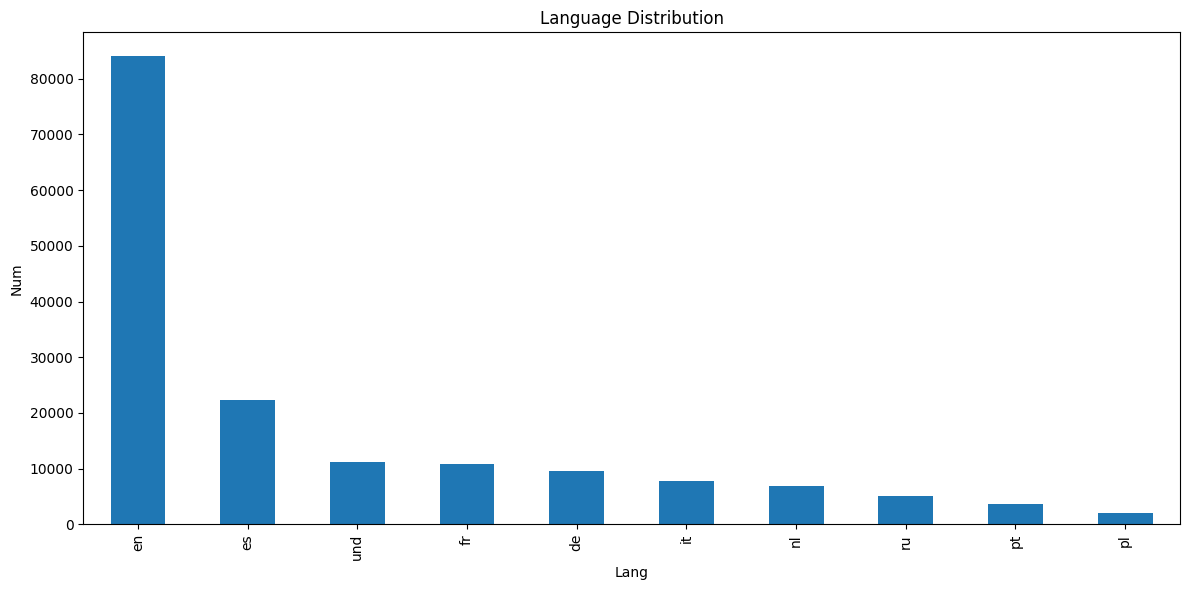

In [5]:
# 统计各语言数量
import matplotlib.pyplot as plt
lang_counts = df['lang'].value_counts()
print("Lanugages:")
for lang, count in lang_counts.items():
    percentage = count / len(df) * 100
    print(f"  {lang}: {count} items, {percentage:.2f} %")
plt.figure(figsize=(12, 6))
lang_counts.head(10).plot(kind='bar')
plt.title('Language Distribution')
plt.xlabel('Lang')
plt.ylabel('Num')
plt.tight_layout()